# MNIST DATASET

## Overview of MNIST Dataset

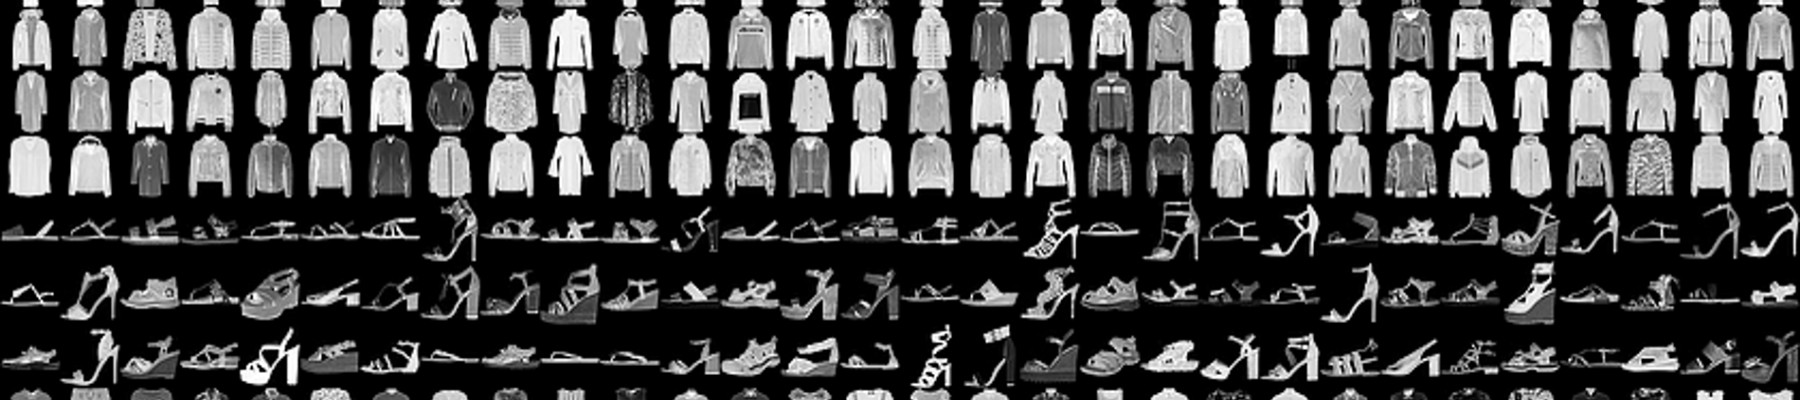

## Overview of the different layers in a NN

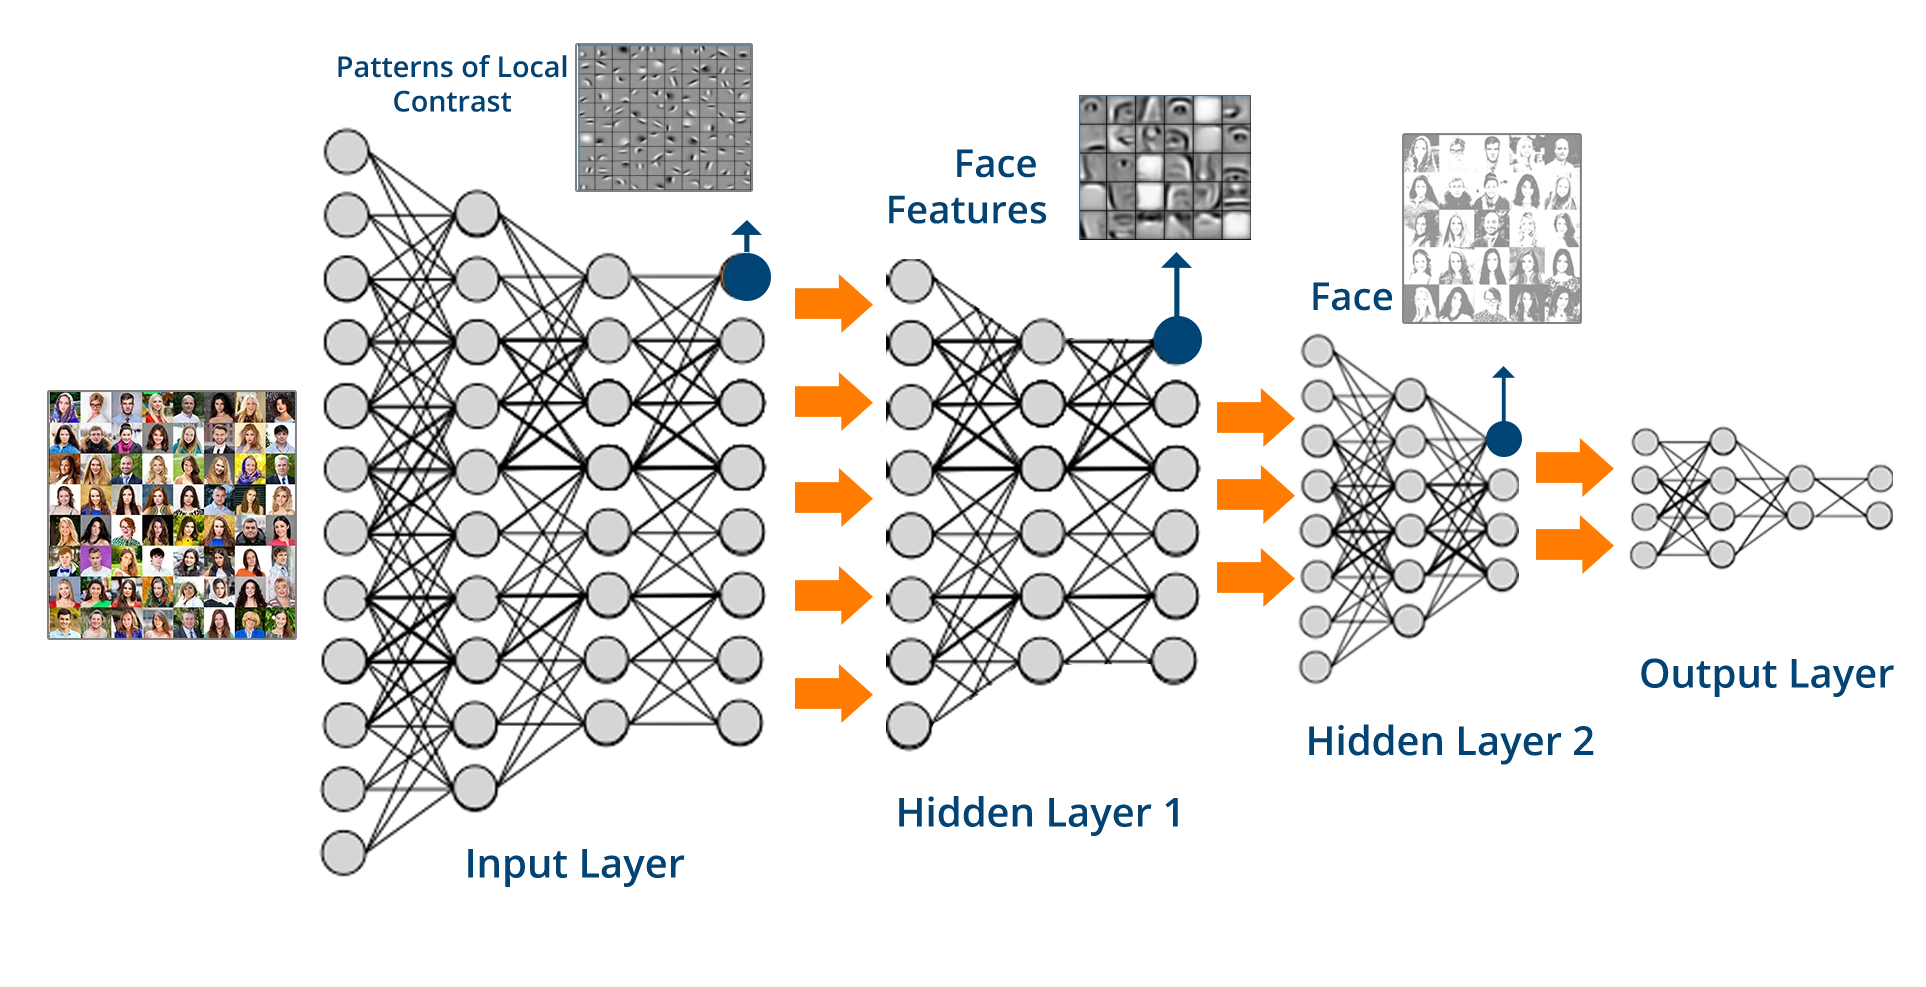

**Here's a 5-step explanation of computer vision:**
- **Image Acquisition:** This is the process of capturing visual information, such as images and videos, and converting them into a format that can be processed by computers.

- **Image Pre-processing:** This step involves cleaning and transforming raw images into a format that is suitable for analysis. This can include techniques such as cropping, resizing, normalizing and removing noise from images.

- **Feature Extraction:** In this step, computers analyze images and extract relevant features, such as lines, edges, and shapes, which are used to make predictions and classifications.

- **Machine Learning:** This step involves using algorithms, such as deep learning, to train computers to recognize patterns and make predictions based on the visual information they receive.

- **Object Recognition and Image Understanding:** The final step involves using the information extracted in the previous steps to recognize objects, classify images, and make predictions about the content and context of visual data. This allows computers to understand and analyze images and videos in the same way that humans do.

## Image Feature Extraction

A colored image is typically composed of multiple colors and almost all colors can be generated from three primary colors – red, green and blue.

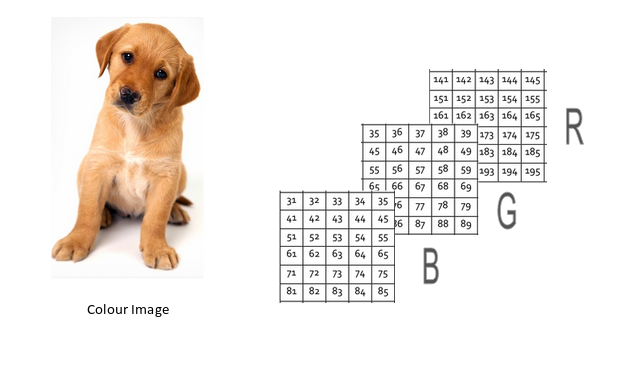

Feature Extraction
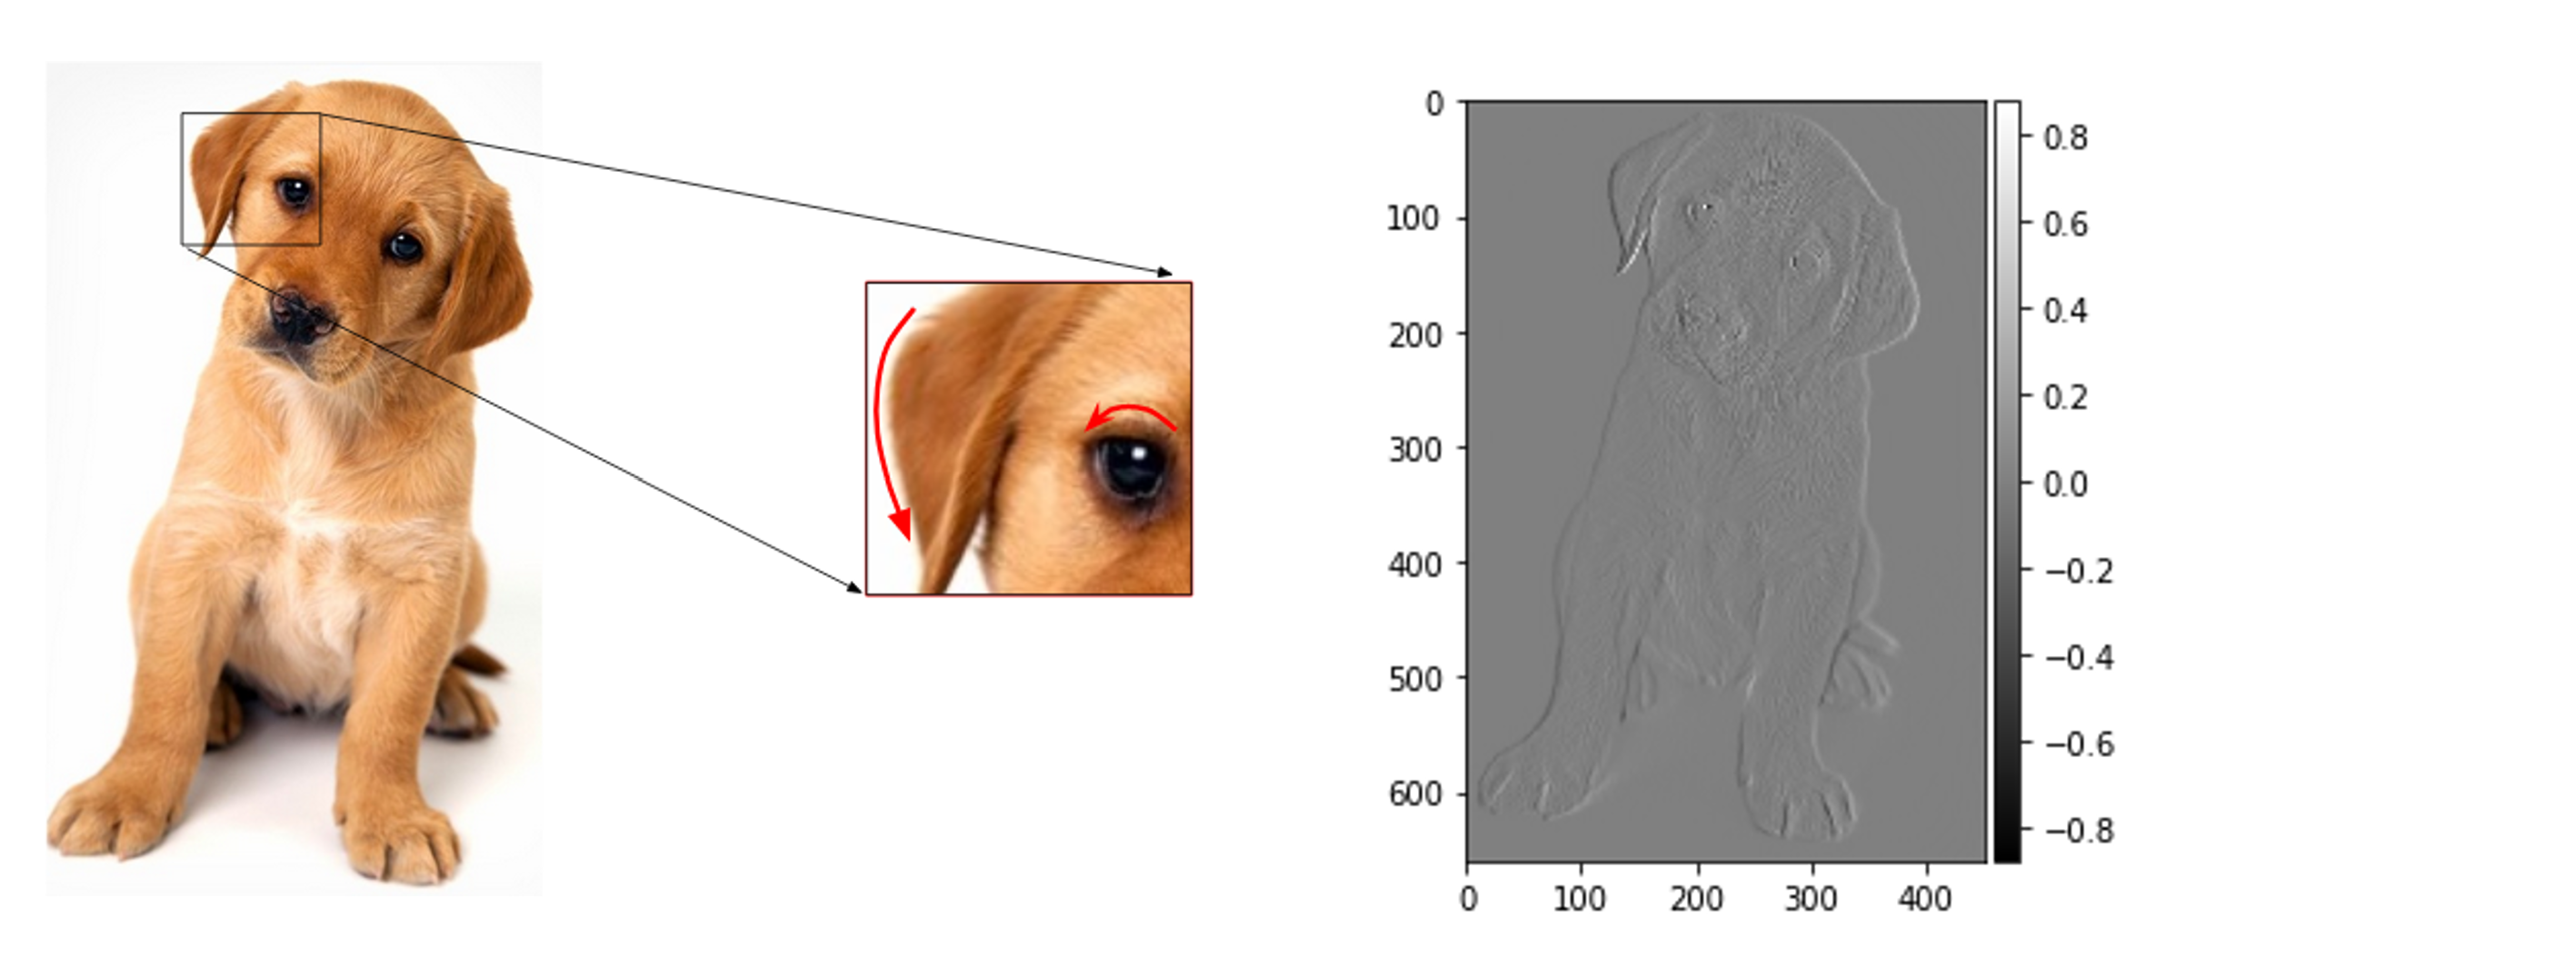

Neural Networks extract features automatically from images.

## MNIST Dataset

- Fashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. 
- Each example is a 28x28 grayscale image, associated with a label from 10 classes. 
- Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

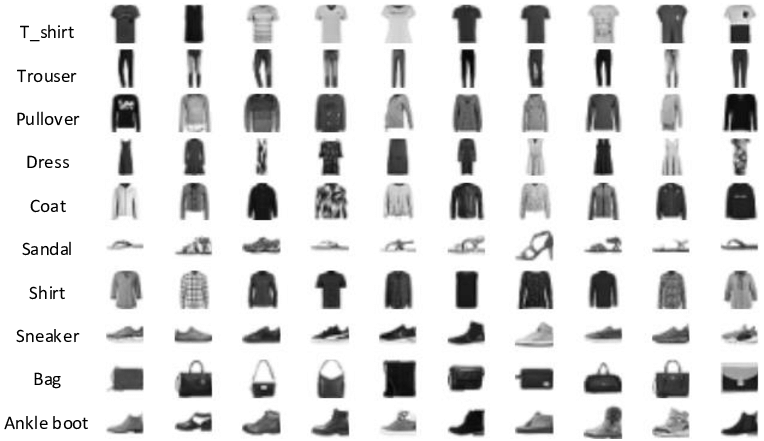

In [4]:
from openml.datasets import get_dataset

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
fashion_mnist = get_dataset('Fashion-MNIST')

C:\Users\ABC\AppData\Local\Temp\ipykernel_3924\2939029955.py:1: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  fashion_mnist = get_dataset('Fashion-MNIST')


In [6]:
fashion_mnist

OpenML Dataset
Name..........: Fashion-MNIST
Version.......: 1
Format........: ARFF
Upload Date...: 2017-12-20 13:28:27
Licence.......: Public
Download URL..: https://api.openml.org/data/v1/download/18238735/Fashion-MNIST.arff
OpenML URL....: https://www.openml.org/d/40996
# of features.: 785
# of instances: 70000

In [ ]:
X, y, _, _ = fashion_mnist.get_data()


In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist_fashion = fetch_openml('Fashion-MNIST', cache=True)

In [ ]:
mnist_fashion.keys()

In [ ]:
print(mnist_fashion['DESCR'])

In [ ]:
mnist_fashion['details']
mnist_fashion['url']

In [ ]:
X = mnist_fashion['data']
y = mnist_fashion['target']

X.shape, y.shape

In [ ]:
classes = ['tshirt', 'trouser', 'pullover', 'dress','coat',
            'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [ ]:
# visualize with 2x5 grid
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['figure.dpi'] = 100

digits = y.unique()
digits = [int(x) for x in digits]
digits.sort()
digits

In [ ]:
plt.rcParams['figure.figsize'] = (15,4)
plt.rcParams['figure.dpi'] = 200

for i in digits:
  plt.subplot(2,5, i+1)
  plt.imshow(X[y==str(i)].iloc[0].to_numpy().reshape(28,28))
  plt.title(classes[i])

plt.tight_layout()

### Designing a Neural Network

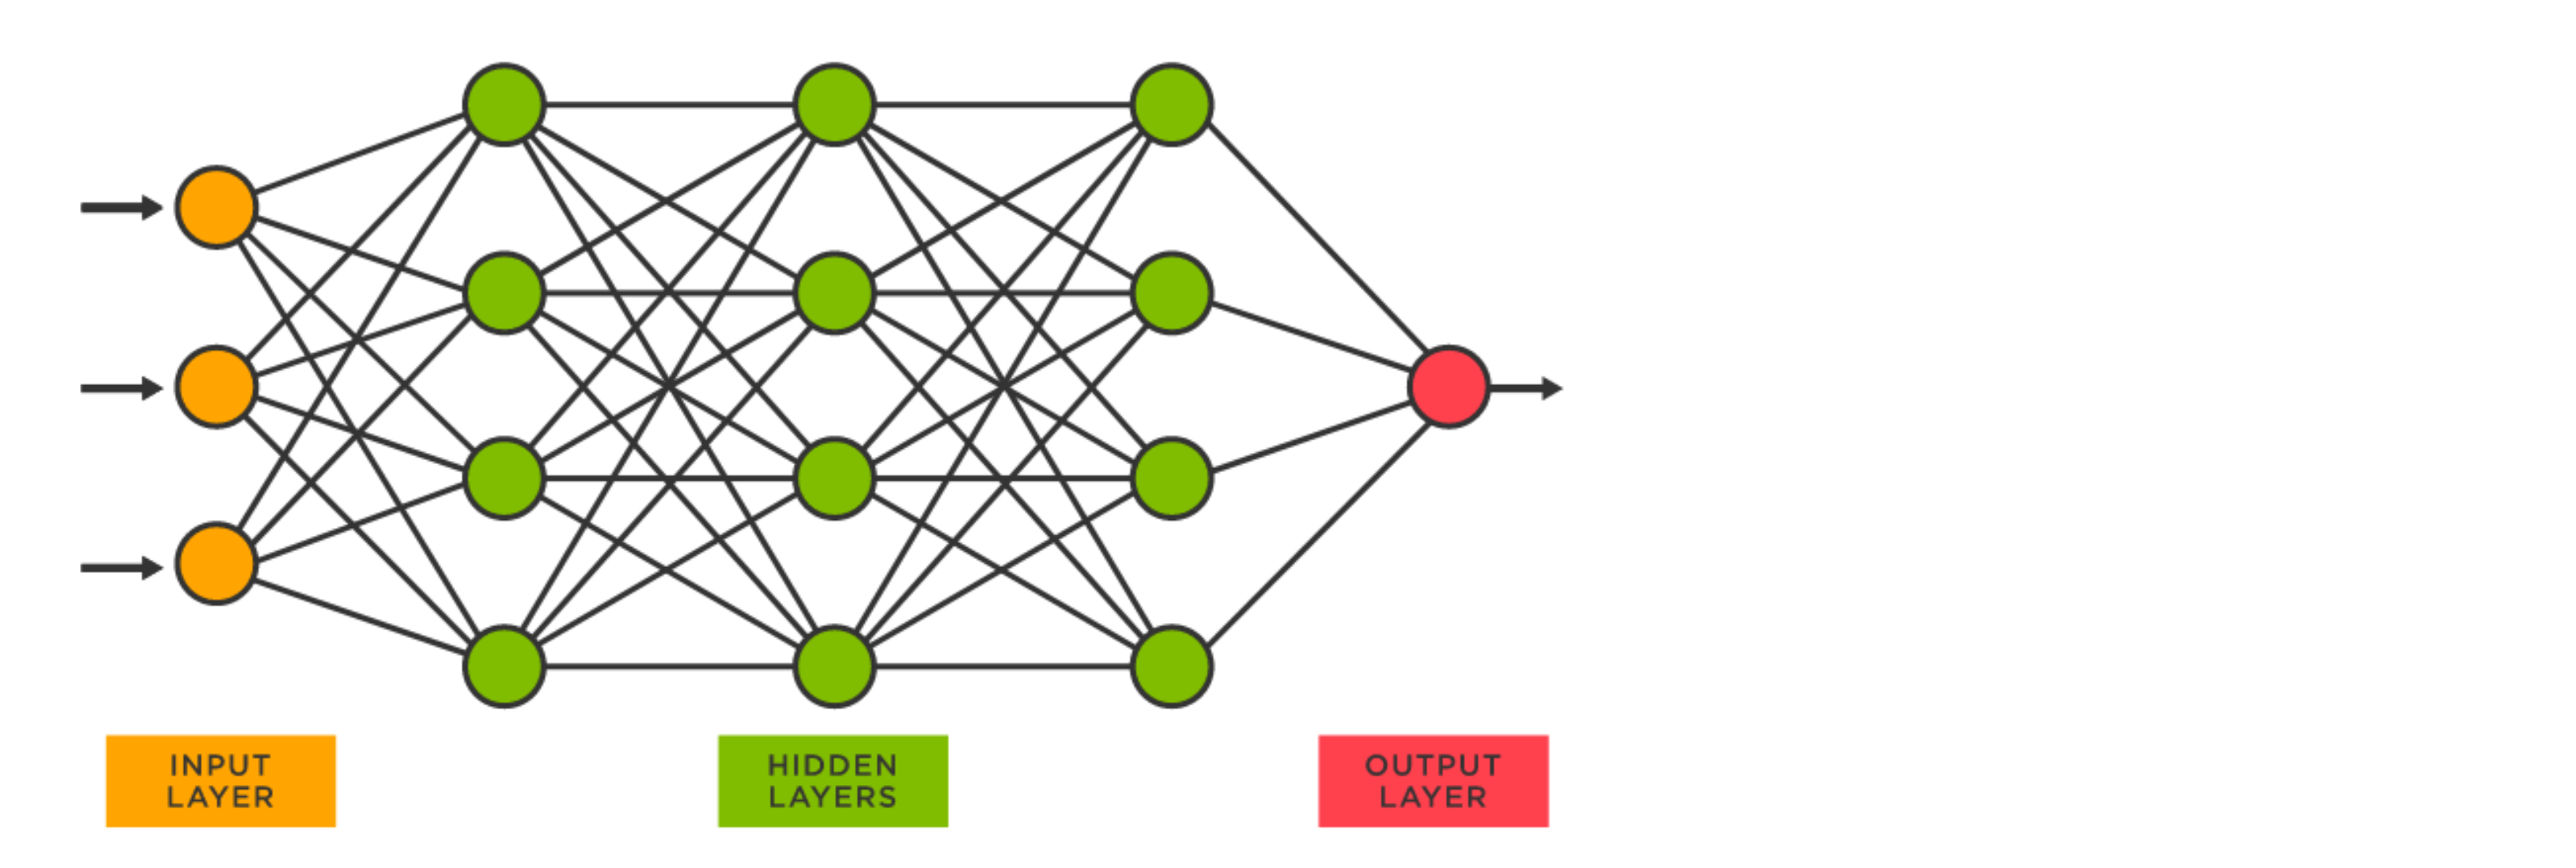

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = y.astype('int')
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X/255, y, test_size=0.2, random_state=42,
                                                    stratify=y)

X_train.shape, X_test.shape

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [ ]:
def get_model():
  model = Sequential()
  model.add(Flatten(input_shape=(X.shape[1],)))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

In [ ]:
model = get_model()

In [ ]:
model.summary()

In [ ]:
784*64+64, 64*128+128, 128*10+10

In [ ]:
model.layers

In [ ]:
model.layers[2].name

In [ ]:
weight1 = model.layers[1].get_weights()

In [ ]:
weight1[0].shape, weight1[1].shape

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)
model.evaluate(X_test, y_test)

In [ ]:
plt.rcParams['figure.figsize'] = (15,4)
plt.rcParams['figure.dpi'] = 200

for i in digits:
  plt.subplot(2,5, i+1)
  test = X_test[y==i].iloc[0].to_numpy()
  plt.imshow(test.reshape(28,28))

  pred = model.predict(test.reshape(1,784,))
  idx = np.argmax(pred[0])
  pred_class = classes[idx]

  plt.title('original: {} | pred: {}'.format(classes[i], pred_class))

plt.tight_layout()

In [ ]:
pred = model.predict(test.reshape(1,784,))
idx = np.argmax(pred[0])
pred_class = classes[idx]
pred_class

In [ ]:
pred[0]

## Discovering Overfitting - Early Stopping
- Early stopping is a technique that allows you to stop training a neural network when it stops improving on a validation dataset.
- This is a form of regularization that can be used to prevent overfitting on a training dataset.
- The easiest way to implement early stopping is to use the EarlyStopping callback provided by Keras.